In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
start= pd.read_csv('/content/credit_train_processed.csv')
start

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,...,Number_of_Credit_Problems,Current_Credit_Balance,Credit_Limit,Bankruptcies,Tax_Liens,DTI,Credit_Utilization,Years_since_last_delinquent,Avg_Account_Age,Annual_Debt
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,...,1,228190,416746.0,1.0,0.0,0.004467,0.547552,0.000000,2.866667,62576.88
1,Fully Paid,262328,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,...,0,229976,850784.0,0.0,0.0,0.014083,0.270311,0.666667,0.602857,399551.76
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,...,1,297996,750090.0,0.0,0.0,0.013083,0.397280,2.416667,0.827778,350406.36
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,...,0,256329,386958.0,0.0,0.0,0.010833,0.662421,0.000000,1.333333,104902.80
4,Fully Paid,176220,Short Term,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,...,0,253460,427174.0,0.0,0.0,0.014083,0.593341,0.000000,0.406667,247676.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,...,0,47766,658548.0,0.0,0.0,0.004633,0.072532,0.000000,4.460000,26434.32
99996,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,...,0,153045,509234.0,0.0,0.0,0.010167,0.300540,1.750000,0.427273,157308.60
99997,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,...,1,109554,537548.0,1.0,0.0,0.006358,0.203803,1.500000,1.566667,87786.84
99998,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,...,0,404225,738254.0,0.0,0.0,0.005758,0.547542,0.000000,1.875000,118680.84


# Removing Categorical Data as we need numerical value **only**

In [25]:
# Identified categorical columns
categorical_cols = start.select_dtypes(include=['object', 'category']).columns

# Drop categorical columns
df_dropped = start.drop(categorical_cols, axis=1)

print(df_dropped.head())

   Current_Loan_Amount  Credit_Score  Annual_Income  Monthly_Debt  \
0               445412         709.0      1167493.0       5214.74   
1               262328         724.0      1174162.0      33295.98   
2             99999999         741.0      2231892.0      29200.53   
3               347666         721.0       806949.0       8741.90   
4               176220         724.0      1174162.0      20639.70   

   Years_of_Credit_History  Months_since_last_delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number_of_Open_Accounts  Number_of_Credit_Problems  Current_Credit_Balance  \
0                        6                          1                  228190   
1                       35                          0         

# Finding the best possible combination for **correlation**

In [28]:
# Calculate the correlation matrix
correlation_matrix = start.corr(numeric_only=True)

# Unstack the matrix to create a Series of correlation pairs
corr_pairs = correlation_matrix.unstack()

# Remove self-correlations (where a variable is correlated with itself)
corr_pairs = corr_pairs[corr_pairs != 1.0]

# Remove duplicate pairs (since correlation is symmetric) and take absolute values
corr_pairs = corr_pairs.abs().drop_duplicates()


# Get the most correlated pair
most_correlated_pair = corr_pairs.sort_values(ascending=False)

print(most_correlated_pair)

Monthly_Debt                  Annual_Debt                    1.000000
Months_since_last_delinquent  Years_since_last_delinquent    1.000000
Number_of_Credit_Problems     Bankruptcies                   0.752859
Number_of_Open_Accounts       Avg_Account_Age                0.581980
Number_of_Credit_Problems     Tax_Liens                      0.581268
                                                               ...   
Credit_Score                  Annual_Debt                    0.000834
                              Monthly_Debt                   0.000834
Credit_Limit                  DTI                            0.000780
Current_Loan_Amount           Bankruptcies                   0.000643
Credit_Score                  Current_Credit_Balance         0.000146
Length: 136, dtype: float64


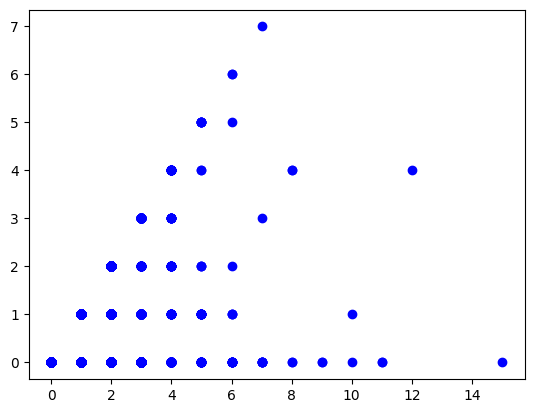

In [29]:
import matplotlib.pyplot as plt
plt.scatter (x=start['Number_of_Credit_Problems'], y = start['Bankruptcies'], color = 'blue')

# **Finding correlation coefficient value**

In [34]:
start['Number_of_Credit_Problems'].corr(start['Bankruptcies'])

0.7528594679644307

In [35]:
decimal = 0.7528594679644307
percentage = decimal * 100
print(percentage, "%")

75.28594679644307 %


# Performing Probability Plot/ QQ **plot**

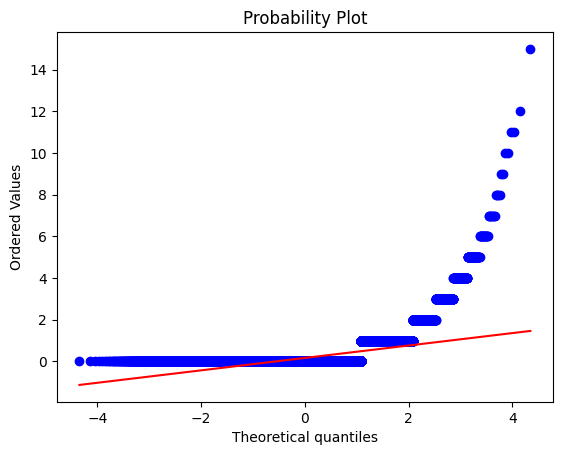

In [36]:
from scipy import stats
import pylab
stats.probplot(start['Number_of_Credit_Problems'], dist="norm", plot=pylab)
pylab.show()

# Calculate Error for regression models

In [37]:
import statsmodels.formula.api as smf

mll = smf.ols(formula = 'Bankruptcies ~ Number_of_Credit_Problems', data = start).fit()
mll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Bankruptcies   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 1.308e+05
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:03:26   Log-Likelihood:                 4601.0
No. Observations:              100000   AIC:                            -9198.
Df Residuals:                   99998   BIC:                            -9179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0253      0.001     32.732      0.000       0.024       0.027
Number_of_Credit_Problems     0.5476      0.002    361.713      0.000       0.545       0.551
==============================================================================
Omnibus:                    85587.275   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19010225.064
Skew:                          -3.351   Prob(JB):                         0.00
Kurtosis:                      70.213   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred1 = mll.predict(pd.DataFrame(start['Number_of_Credit_Problems']))
pred1

,0
0,0.572940
1,0.025332
2,0.572940
3,0.025332
4,0.025332
...,...
99995,0.025332
99996,0.025332
99997,0.572940
99998,0.025332


# Generating Regression line

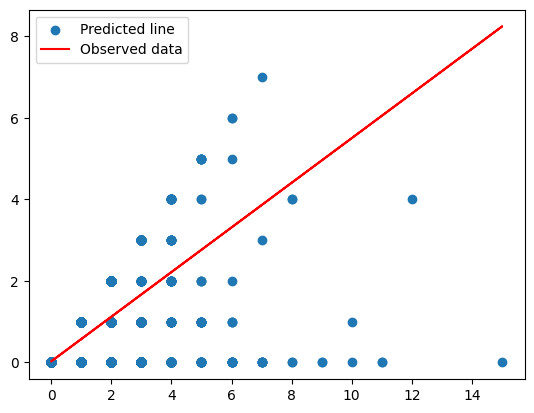

In [39]:
plt.scatter(start.Number_of_Credit_Problems, start.Bankruptcies)
plt.plot(start.Number_of_Credit_Problems, pred1, 'r')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Calculating the error

In [40]:
resl = start.Bankruptcies - pred1
real_sqrl = resl * resl
msel = np.mean(real_sqrl)
rmsel = np.sqrt(msel)
rmsel

0.23108983461347238